In [1]:
from diffusion_map import *

## Part one: 
Use the algorithm to demonstrate the similarity of Diffusion Maps and Fourier analysis. To do
this, compute five eigenfunctions ϕl associated to the largest eigenvalues λl with Diffusion Maps, on a periodic
data set with N = 1000 points.

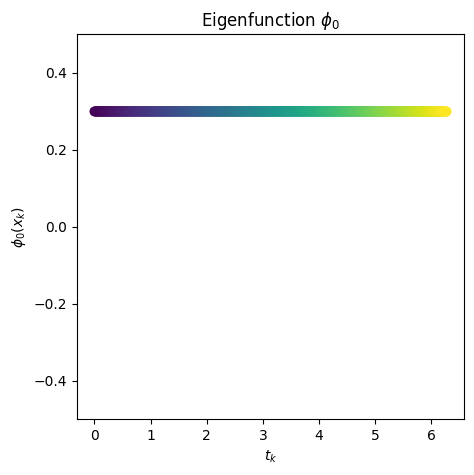

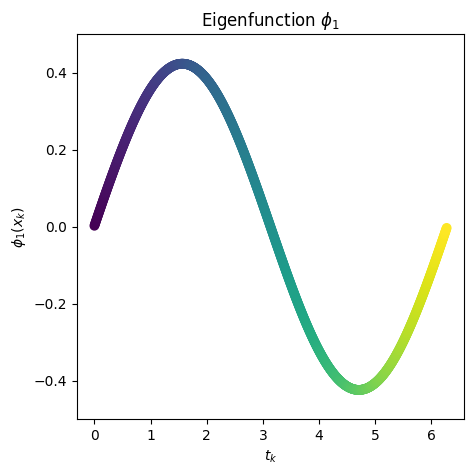

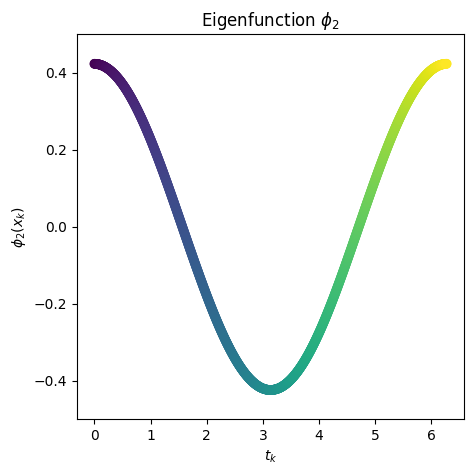

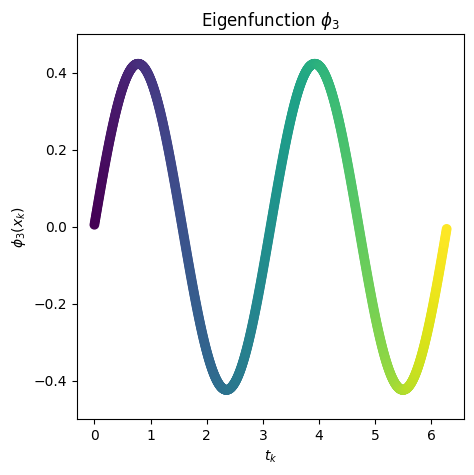

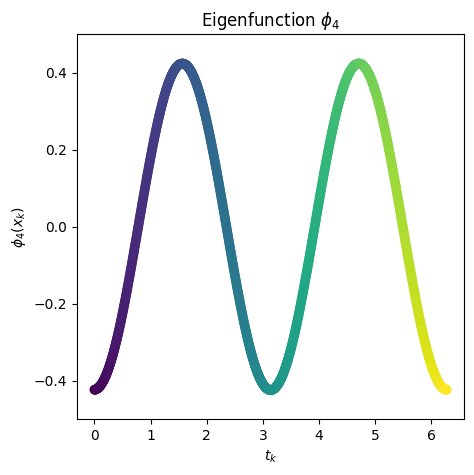

In [2]:
#Create the dataset for part one of task 2
x, t = create_periodic_data()
L = 5 #First 5 eigenfunctions

#Compute the diffusion map for the dataset
lambda_values, phi = diffusion_map(x, L = L)

#Plot the eigenfunctions against t_k
plot_eigenfunctions(phi, t, L, save=True, filename="eigenfunctions_periodic", task=1)

## Part two: 
Use the algorithm to obtain the first ten eigenfunctions of the Laplace Beltrami operator on the
“swiss roll” manifold with 5000 data points.

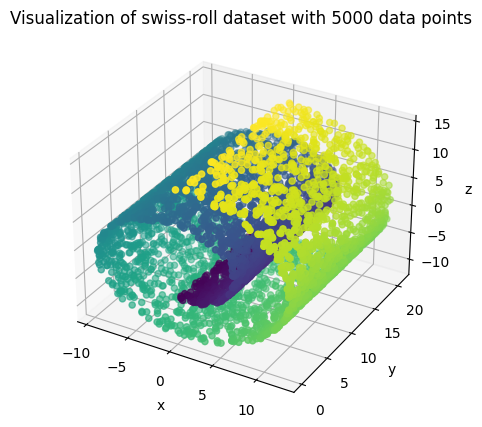

In [3]:
#Create swiss roll data for part two of task 2
x, t = create_swiss_roll_data(N=5000)

#Visualize the swiss roll data
plot_3d_data(x, t, save=True, title = 'Visualization of swiss-roll dataset with 5000 data points', filename="swiss_roll_data_5000")

Compute eigenfunctions and plot it against phi_1

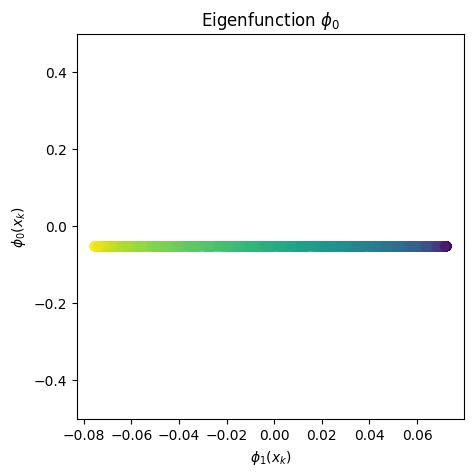

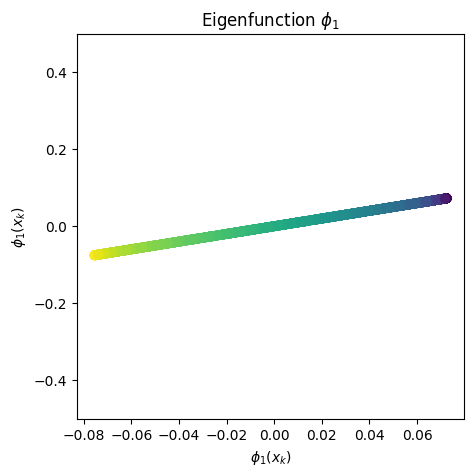

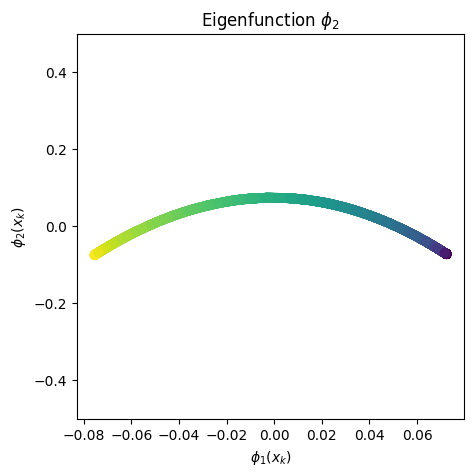

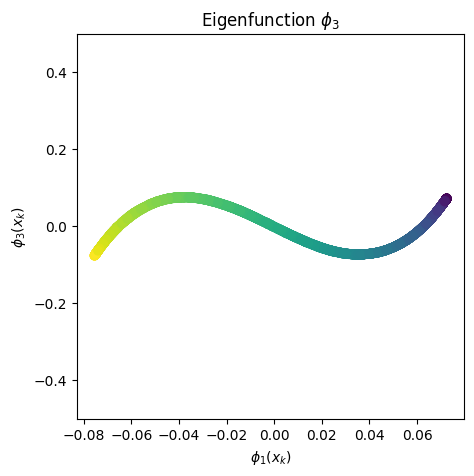

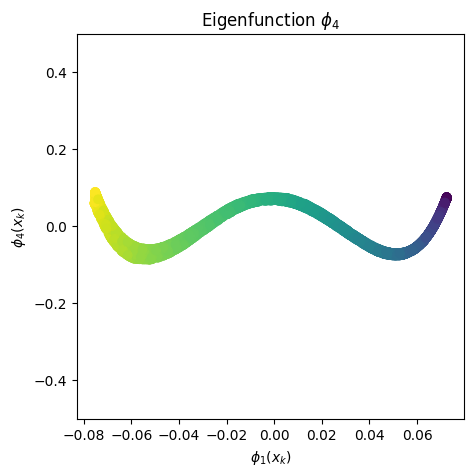

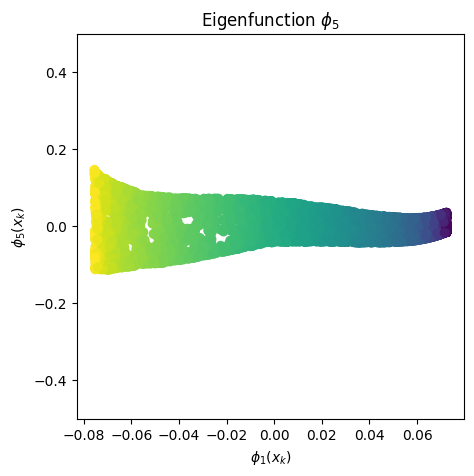

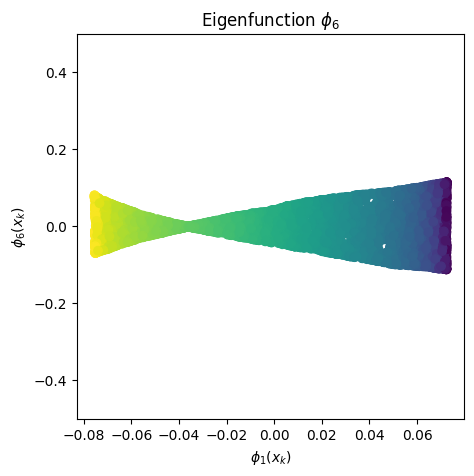

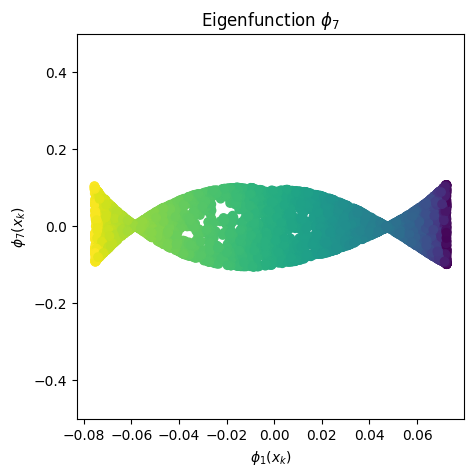

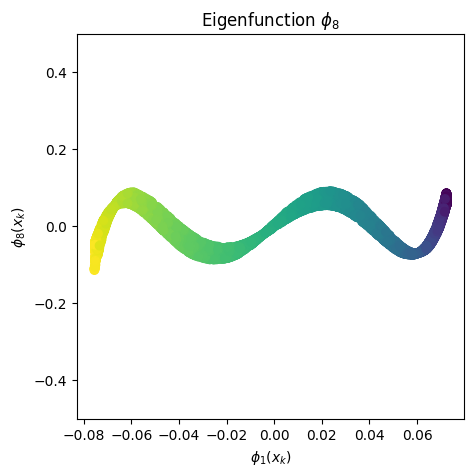

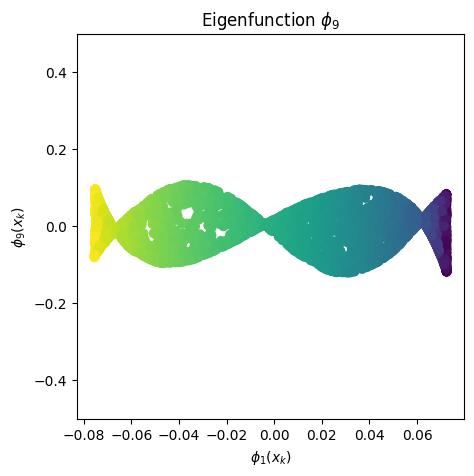

In [4]:
L = 10 #First 10 eigenvalues and eigenvectors
lambda_values, phi = diffusion_map(x, L = L)

#Plot the eigenfunctions against phi_1
plot_eigenfunctions(phi, t, L, save=True, filename="eigenfunctions_swiss_roll_5000", task=2)

Compute the three and two principal components of the swiss-roll dataset, and plot the reconstructed dataset, with 5000 data points.

Explained variance ratio for PC1: 0.4000
Explained variance ratio for PC2: 0.3162
Explained variance ratio for PC3: 0.2838


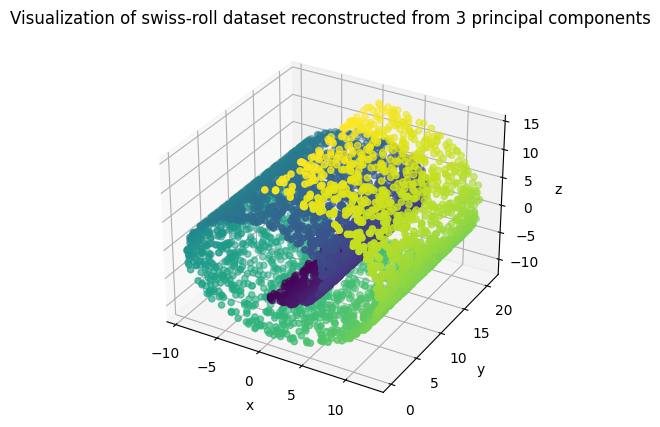

Explained variance ratio for PC1: 0.4000
Explained variance ratio for PC2: 0.3162


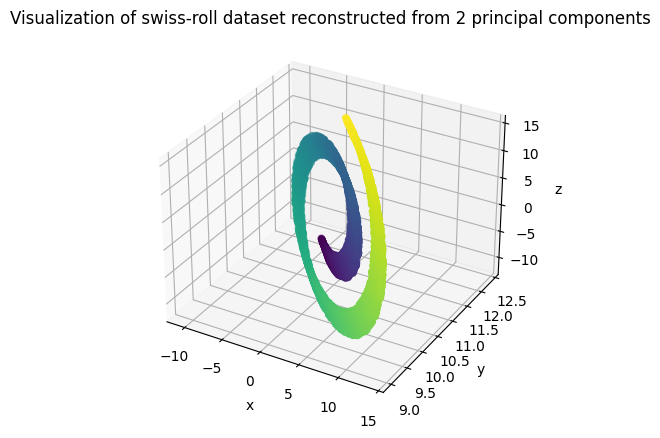

In [5]:
# Compute 3 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x, 3)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t, title = 'Visualization of swiss-roll dataset reconstructed from 3 principal components', save=True, filename="reconstructed_swiss_roll_data_5000_3pc")

# Compute 2 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x, 2)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t, title = 'Visualization of swiss-roll dataset reconstructed from 2 principal components', save=True, filename="reconstructed_swiss_roll_data_5000_2pc")

Create “swiss roll” manifold with 1000 data points.

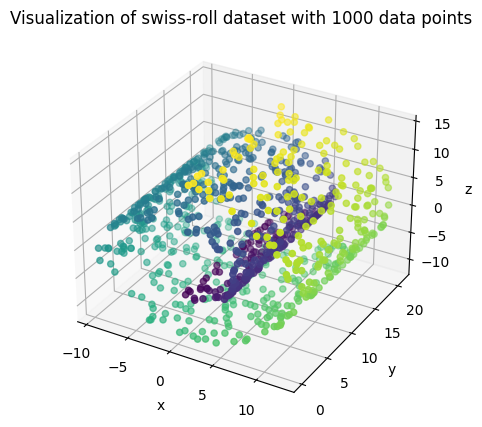

In [6]:
# Create swiss roll data for part two of task 2 with 1000 data points
x, t = create_swiss_roll_data(N=1000)

# Plot the swiss roll data with 1000 data points
plot_3d_data(x, t, title= 'Visualization of swiss-roll dataset with 1000 data points', save=True, filename="swiss_roll_data_1000")

Compute eigenfunctions for swiss-roll dataset with 1000 data points, and plot.

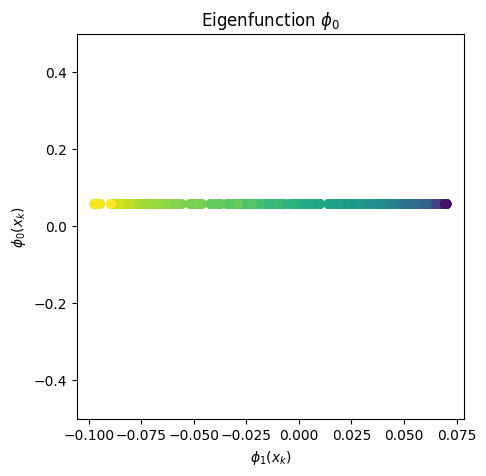

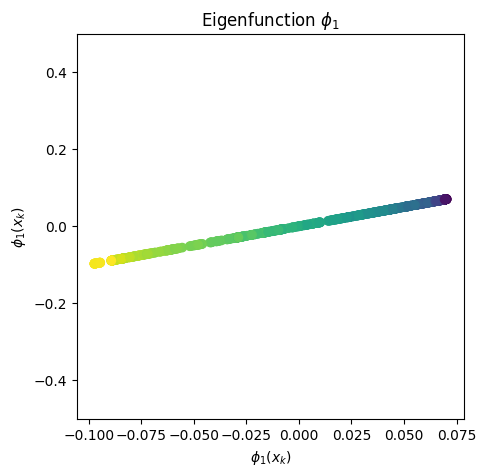

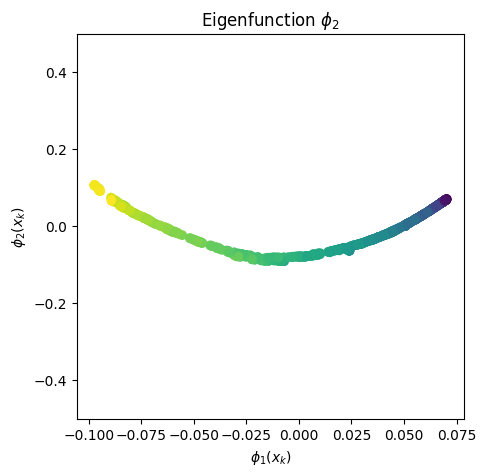

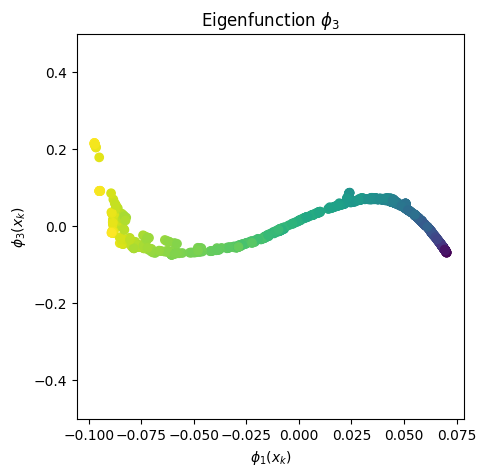

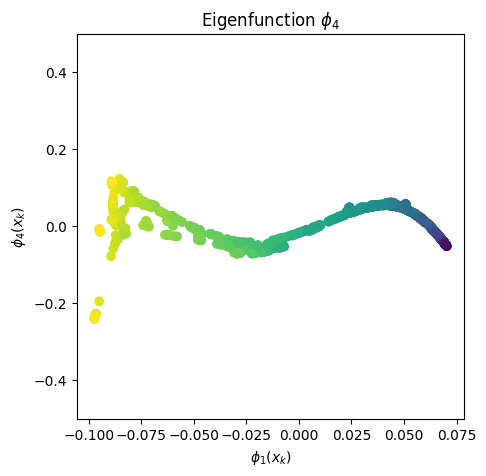

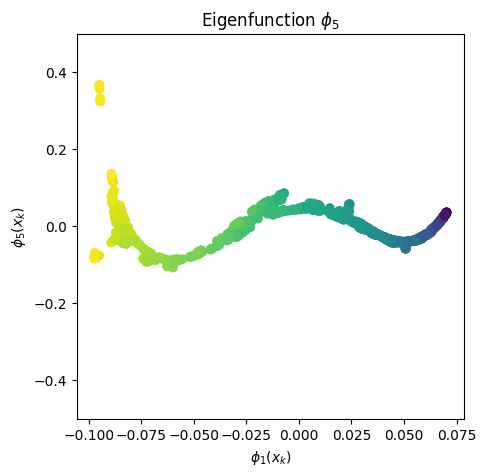

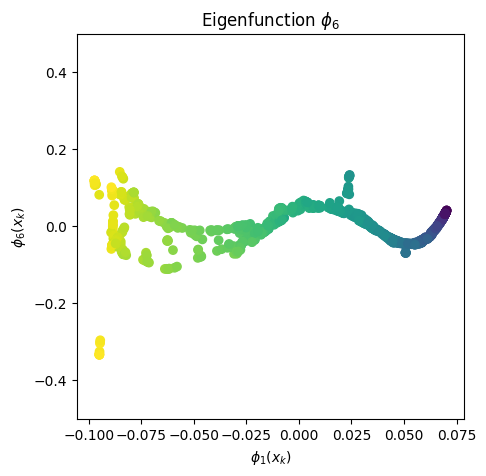

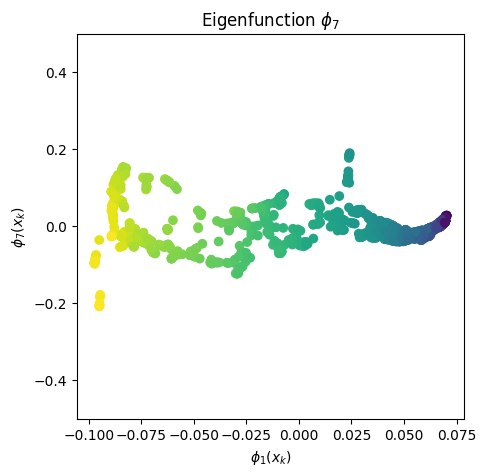

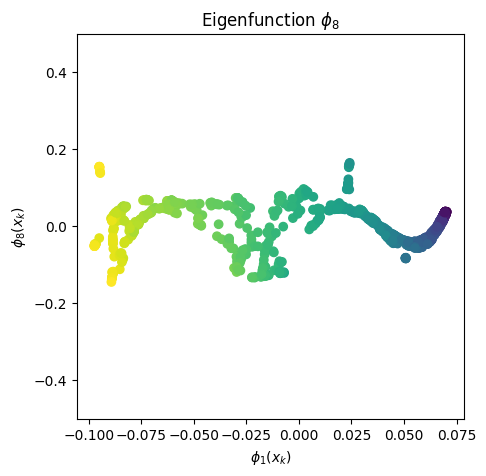

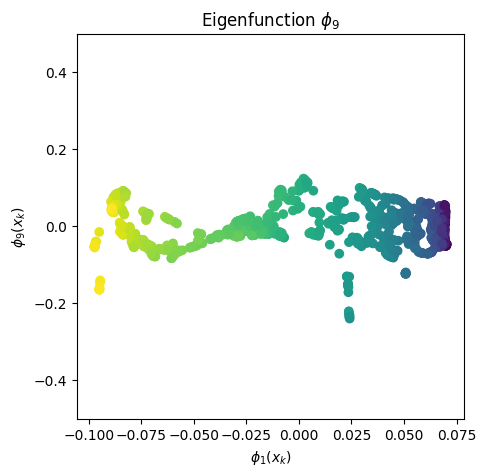

In [7]:
L = 10 #First 10 eigenvalues and eigenvectors
lambda_values, phi = diffusion_map(x, L = L)

#Plot the eigenfunctions against phi_1
plot_eigenfunctions(phi, t, L, save=True, filename="eigenfunctions_swiss_roll_1000", task=2)

Compute the three and two principal components of the swiss-roll dataset, and plot the reconstructed dataset, with 1000 data points.

Explained variance ratio for PC1: 0.3875
Explained variance ratio for PC2: 0.3319
Explained variance ratio for PC3: 0.2806


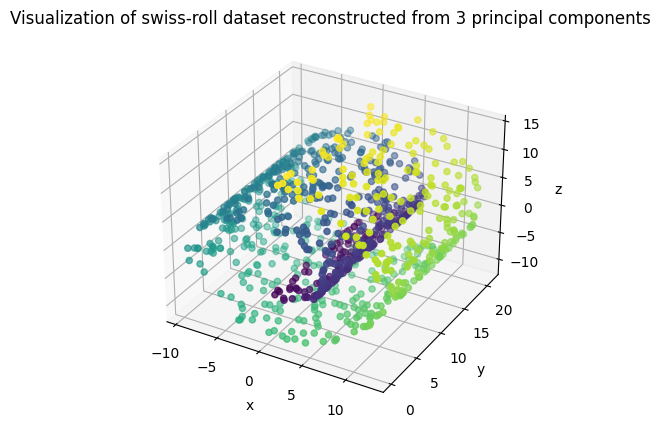

Explained variance ratio for PC1: 0.3875
Explained variance ratio for PC2: 0.3319


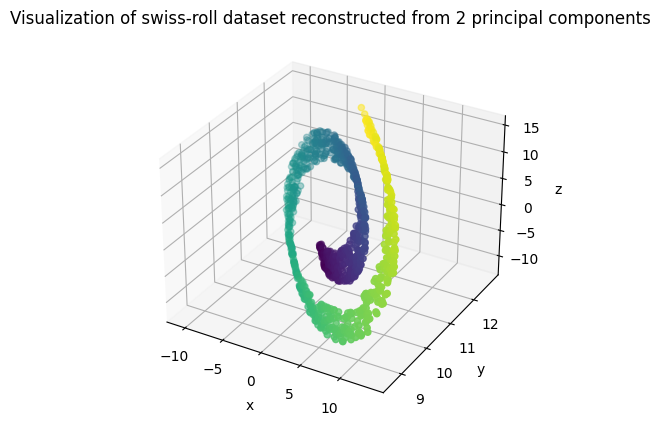

In [8]:
# Compute 3 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x, 3)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t, title = 'Visualization of swiss-roll dataset reconstructed from 3 principal components', save=True, filename="reconstructed_swiss_roll_data_1000_3pc")

# Compute 2 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x, 2)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t, title = 'Visualization of swiss-roll dataset reconstructed from 2 principal components', save=True, filename="reconstructed_swiss_roll_data_1000_2pc")

## Part three:

Concerns the trajectory data in the file data DMAP PCA vadere.txt on Moodle.
Perform the same analysis you did with PCA.


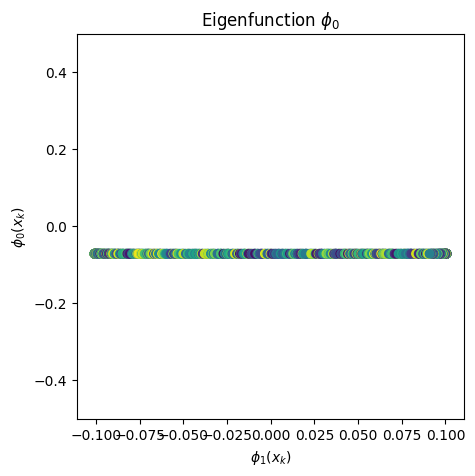

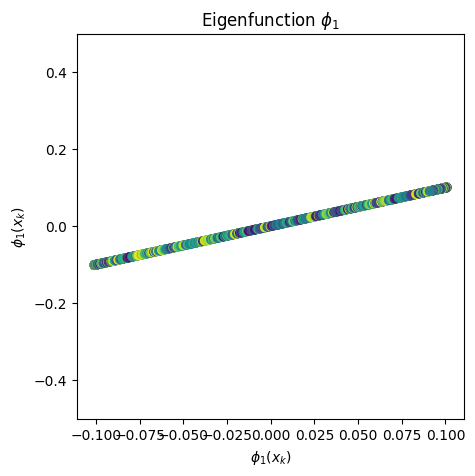

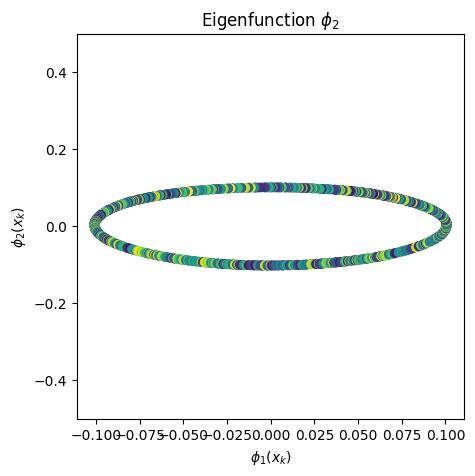

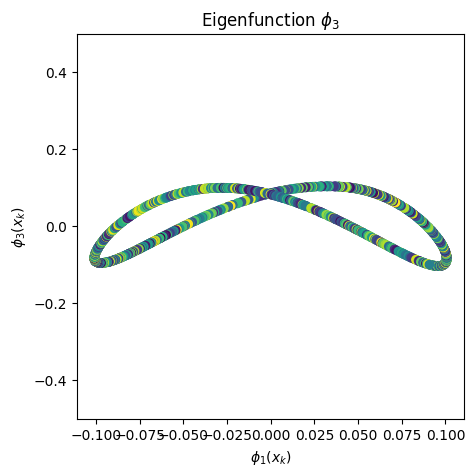

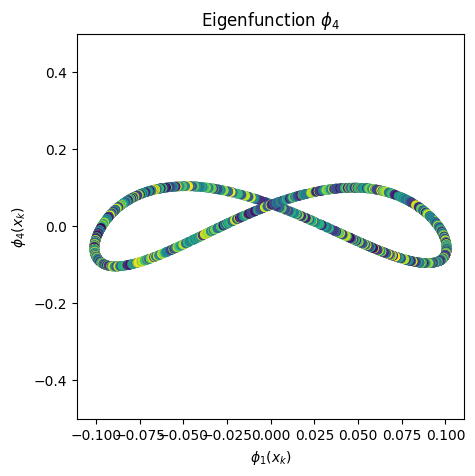

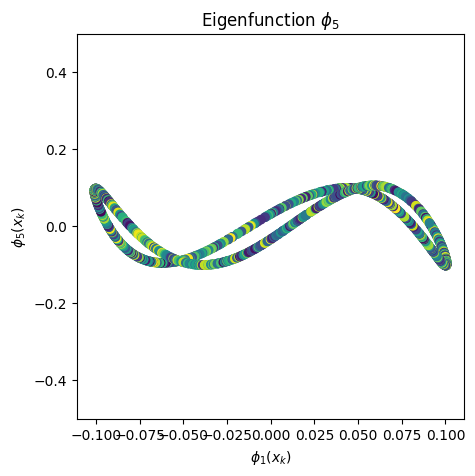

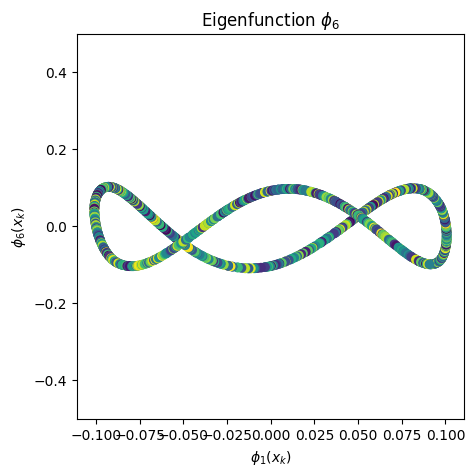

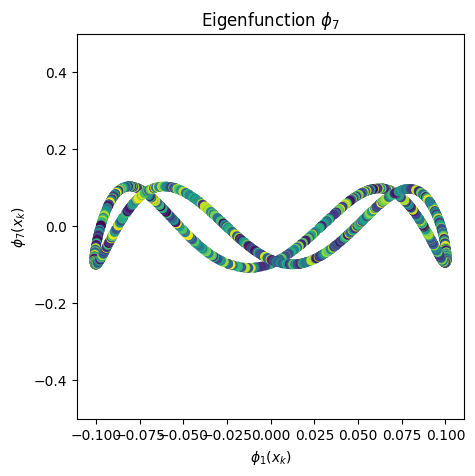

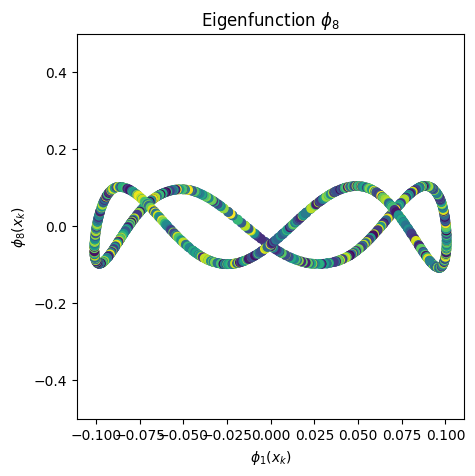

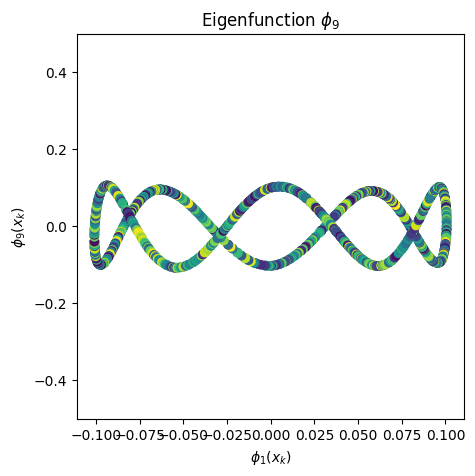

In [9]:
#Load the trajectories data
trajs = np.loadtxt("../data_DMAP_PCA_vadere.txt")

#Compute the diffusion map for the dataset
L = 10 #First 10 eigenfunctions
lambda_values, phi = diffusion_map(trajs, L = L)

#Plot the eigenfunctions against t_k
plot_eigenfunctions(phi, t, L, save=True, filename="eigenfunctions_trajectories", task=2)